# 동완

In [ ]:
from qiskit.circuit.library import ZZFeatureMap



def FeatureMapBuilder(num_features, reps):
    feature_map = ZZFeatureMap(
        feature_dimension=num_features,
        reps=reps,
    )
    return feature_map

my_feature_map = FeatureMapBuilder(3, 2)
# my_feature_map.decompose().draw("mpl", style="clifford")

In [2]:
from qiskit.circuit.library import TwoLocal

def AnsatzBuilder(num_qubits, reps):
    ansatz = TwoLocal(
        num_qubits=num_qubits,
        rotation_blocks='ry',
        entanglement_blocks='cx',
        entanglement='full', 
        reps=reps, 
        insert_barriers=True
    )
    return ansatz

my_ansatz = AnsatzBuilder(5, 3)
# my_ansatz.decompose().draw("mpl")

# 영호

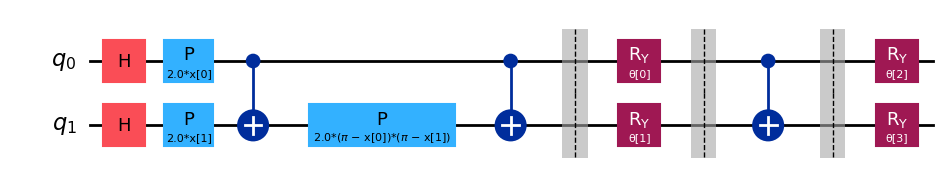

In [ ]:
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, ParameterVector


# 2 qubit qnn circuit 

qc = QuantumCircuit(2)
feature_map = FeatureMapBuilder(2,1)
ansatz = AnsatzBuilder(2,1)

qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw('mpl')

In [ ]:
#effective dimension 계산에 필요한 라이브러리
import numpy as np
from IPython.display import clear_output
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals
from qiskit.primitives import StatevectorSampler as Sampler
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EffectiveDimension, LocalEffectiveDimension
from qiskit_machine_learning.neural_networks import SamplerQNN

In [ ]:
#SamplerQNN, EffectiveDimension 정의
sampler = Sampler()

#samplerQNN 정의
qnn = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    sampler=Sampler(),
)

#effective dimension 정의
'''
num_input_samples = 10
num_weight_samples = 10


global_ed = EffectiveDimension(
    qnn=qnn, weight_samples=num_weight_samples, input_samples=num_input_samples
)
'''

input_samples = algorithm_globals.random.normal(0, 1, size=(10, qnn.num_inputs))
weight_samples = algorithm_globals.random.uniform(0, 1, size=(10, qnn.num_weights))

global_ed = EffectiveDimension(qnn=qnn, weight_samples=weight_samples, input_samples=input_samples)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Data size: 5000, global effective dimension: 3.9190
Number of weights: 4, normalized effective dimension: 0.9798


Effective dimension: [3.91642594 3.91983613 3.92170997 3.9337682  3.93699348 3.94075402
 3.94349746 3.94531932 3.95049234 3.95384773]
Number of weights: 4


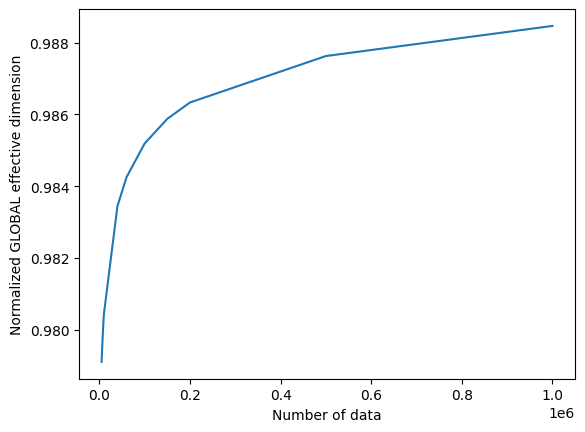

In [ ]:
n = [5000, 8000, 10000, 40000, 60000, 100000, 150000, 200000, 500000, 1000000]
def plot_effective_dimension(input_samples,weight_samples):
    global_ed = EffectiveDimension(qnn=qnn, weight_samples=weight_samples, input_samples=input_samples)

    global_eff_dim_0 = global_ed.get_effective_dimension(dataset_size=n[0])

    d = qnn.num_weights
    
    print("Data size: {}, global effective dimension: {:.4f}".format(n[0], global_eff_dim_0))
    print(
        "Number of weights: {}, normalized effective dimension: {:.4f}".format(d, global_eff_dim_0 / d)
    )

    global_eff_dim_1 = global_ed.get_effective_dimension(dataset_size=n)
    print("Effective dimension: {}".format(global_eff_dim_1))

    print("Number of weights: {}".format(d))
    plt.plot(n, np.array(global_eff_dim_1) / d)
    plt.xlabel("Number of data")
    plt.ylabel("Normalized GLOBAL effective dimension")
    plt.show()